In [24]:
import re
import unicodedata
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords


import prepare

In [4]:
df = pd.read_csv('spam_clean.csv')

In [6]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
plt.rc("patch", edgecolor="black", force_edgecolor=True)
plt.rc("axes", grid=True)
plt.rc("grid", linestyle=":", linewidth=0.8, alpha=0.7)
plt.rc("axes.spines", right=False, top=False)
plt.rc("figure", figsize=(11, 8))
plt.rc("font", size=12.0)
plt.rc("hist", bins=25)

In [10]:
ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']

def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [11]:
df.shape

(5572, 2)

In [16]:
df.isna().sum()

label    0
text     0
dtype: int64

In [18]:
df.text.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: text, dtype: object

### What percentage of the data is spam?

,n,percent
ham,4825,0.865937
spam,747,0.134063


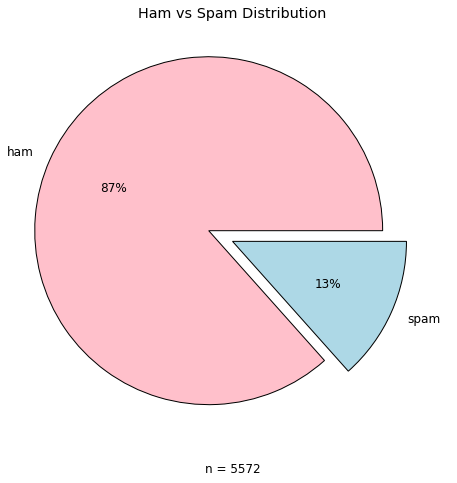

In [20]:
df.label.value_counts().plot.pie(
    colors = ['pink', 'lightblue'], explode = (.15, 0), autopct = '%.0f%%')
plt.title("Ham vs Spam Distribution")
plt.ylabel("")
plt.xlabel('n = %d' % df.shape[0])

pd.concat(
    [df.label.value_counts(), df.label.value_counts(normalize = True)], axis = 1).set_axis(["n", "percent"], axis = 1, inplace = False)

### Let's first take a look at how many of the messages are spam vs ham:

In [21]:
labels = pd.concat([df.label.value_counts(),
                    df.label.value_counts(normalize=True)], axis=1)
labels.columns = ['n', 'percent']
labels

,n,percent
ham,4825,0.865937
spam,747,0.134063


### Let's break the data up into 3 seperate pieces:

The words that appear in legitimate text messages.
The words that appear in spam text messages.
All of the words.

In [60]:
pd.Series(" ".join(df.text).split()).value_counts()

to                         2134
you                        1622
I                          1466
a                          1327
the                        1197
and                         857
in                          798
is                          781
i                           742
u                           692
for                         644
my                          628
of                          591
your                        560
me                          557
on                          487
have                        474
2                           453
that                        421
it                          396
are                         396
call                        376
or                          373
be                          362
at                          359
with                        349
not                         340
will                        330
get                         326
can                         304
                           ... 
mrng"   

In [22]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [61]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/timothysotirhos/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [62]:
all_words = clean(' '.join(df.text))
ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))

### Once we have a list of words, we can transform it into a pandas Series, which we can then use to show us how often each of the words occurs.

In [63]:
all_freq = pd.Series(all_words).value_counts()
ham_freq = pd.Series(ham_words).value_counts()
spam_freq = pd.Series(spam_words).value_counts()

In [64]:
all_freq.head(3)

call    600
im      462
get     397
dtype: int64

### Now we'll combine these three together to get one resulting data frame that we can work with:

In [49]:
word_counts = (pd.concat([all_freq, ham_freq, spam_freq], axis=1, sort=True)
                .set_axis(['all', 'ham', 'spam'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

In [51]:
word_counts.head().T

,0,008704050406,0089my,0121,01223585236
all,3,2,1,1,1
ham,0,0,0,0,0
spam,3,2,1,1,1


In [52]:
tf = (
    pd.concat([all_freq, ham_freq, spam_freq], axis=1, sort=True)
    .rename(columns={0: "all", 1: "ham", 2: "spam"})
    .fillna(0)
    .apply(lambda col: col.astype(int))
)

In [55]:
tf.head().T

,0,008704050406,0089my,0121,01223585236
all,3,2,1,1,1
ham,0,0,0,0,0
spam,3,2,1,1,1


- most common words overall?
- most common spam, ham words?
- any words that uniquely spam or ham?

In [59]:
tf.sort_values(by = 'all').tail(10)

,all,ham,spam
know,267,241,26
free,275,59,216
ok,277,272,5
dont,279,257,22
4,287,168,119
go,304,273,31
ur,384,240,144
get,397,314,83
im,462,449,13
call,600,241,359
